# <h1 align="center"><font color="red">Vibration: Time Domain vs Frequency Domain</font></h1>

<font color="pink">Senior Data Scientist.: Dr. Eddy Giusepe Chirinos Isidro</font>

![](https://data.crazyengineers.com/old-attachments/1/1452-time_vs_freq1.gif)

# <font color="gree">Domínio do Tempo</font>

<font color="orange">O `"domínio do tempo"` refere-se à análise de um sinal de vibração em relação ao tempo. Neste domínio, você observa como a amplitude da vibração (geralmente medida em `velocidade`, `aceleração` ou `deslocamento`) varia ao longo do tempo. É a representação mais direta e intuitiva de um sinal de vibração, mostrando o comportamento do sistema mecânico momento a momento.</font>

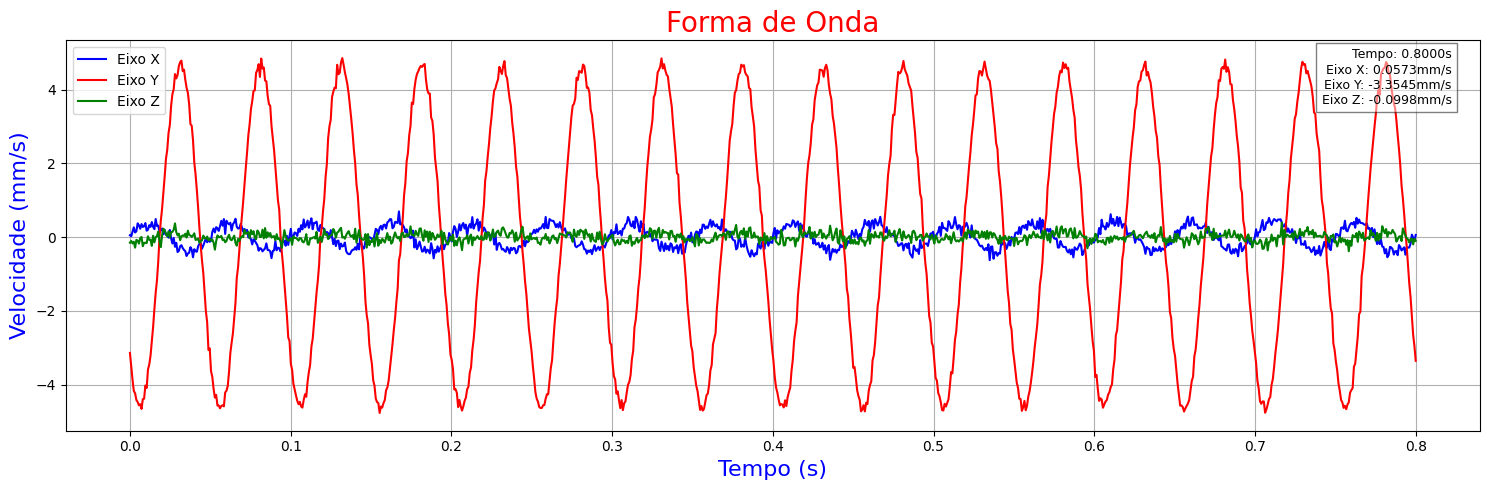

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Semente aleatória para reprodutibilidade:
np.random.seed(42)

# Configuração dos parâmetros:
tempo = np.linspace(0, 0.8, 1000)
frequencia = 20  # Hz

# Geração dos sinais de vibração:
x = 0.3794 * np.sin(2 * np.pi * frequencia * tempo) + 0.1 * np.random.randn(len(tempo)) # Uma onda senoidal com ruído aleatório
y = -4.6386 * np.sin(2 * np.pi * frequencia * tempo + np.pi/4) + 0.1 * np.random.randn(len(tempo))
z = -0.0973 * np.sin(2 * np.pi * frequencia * tempo + np.pi/3) + 0.1 * np.random.randn(len(tempo))

# Criação do gráfico:
plt.figure(figsize=(15, 5))
plt.plot(tempo, x, label='Eixo X', color='blue')
plt.plot(tempo, y, label='Eixo Y', color='red')
plt.plot(tempo, z, label='Eixo Z', color='green')

plt.title('Forma de Onda', c="r", size="20")
plt.xlabel('Tempo (s)', c="b", size="16")
plt.ylabel('Velocidade (mm/s)', c="b", size="16")
plt.legend()
plt.grid(True)

# Adicionar informações no canto superior direito:
plt.text(0.98, 0.98, f'Tempo: {tempo[-1]:.4f}s\n'
                     f'Eixo X: {x[-1]:.4f}mm/s\n'
                     f'Eixo Y: {y[-1]:.4f}mm/s\n'
                     f'Eixo Z: {z[-1]:.4f}mm/s',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5)) # gca() significa "get current axes" (obter os eixos atuais).

plt.tight_layout() # plt.tight_layout() é usado no Matplotlib para ajustar automaticamente a posição dos elementos no gráfico, como rótulos, títulos, eixos, legendas, e outros, de maneira que eles não fiquem sobrepostos e sejam exibidos de forma clara.
#plt.savefig('forma_de_onda.jpg')
plt.show()

<font color="red">Alguns Insights:</font>

Na legenda do gráfico:

* `Eixo X`: 0.0573 mm/s

Este é um valor positivo, indicando que naquele instante específico, o movimento no eixo X era na direção considerada `"positiva"`.


* `Eixo Y`: -3.3545 mm/s

Valor negativo, significando movimento na direção "negativa" do eixo Y.


* `Eixo Z`: -0.0998 mm/s

Também negativo, mas com uma magnitude muito menor que o eixo Y.



Estes valores representam a `velocidade instantânea` em cada eixo no último ponto do tempo simulado (`0.8000s`, conforme mostrado no gráfico).

`Interpretação no contexto de vibração`:

* A maior amplitude de vibração está no `eixo Y`, sugerindo que o movimento principal ocorre nesta direção.

* O `eixo X` tem uma vibração moderada.

* O `eixo Z` mostra a menor vibração, indicando movimento mínimo nesta direção.

Esta distribuição de amplitudes entre os eixos pode fornecer pistas sobre a `natureza do problema` ou a `característica da máquina`. Por exemplo:

* Em um `motor horizontal`, vibrações mais altas no `eixo Y (vertical)` podem indicar `desbalanceamento`.

* Vibrações significativas em múltiplos eixos podem sugerir `desalinhamento` ou `problemas de fundação`.

Lembre-se que estes são valores instantâneos e a análise completa requer a observação do padrão ao longo do tempo, bem como a análise no `domínio da frequência`.

# <font color="gree">Domínio de Frequência</font>

Na `Análise de Vibração` e processamento de sinais, o domínio de frequência permite que você veja o conteúdo de frequência de um sinal, em vez de observá-lo no `domínio do tempo`, que apenas mostra como o sinal varia ao longo do tempo. Já o `domínio de frequência` nos dá uma perspectiva de como diferentes frequências contribuem para a composição de um sinal.

`O domínio de frequência é uma representação de um sinal que mostra como a amplitude do sinal varia com a frequência. Em vez de observar como um sinal muda ao longo do tempo, como no domínio do tempo, a análise no domínio da frequência permite identificar quais frequências estão presentes em um sinal e a intensidade dessas frequências. Isso é especialmente útil em análises de vibração, onde as frequências podem indicar problemas mecânicos ou anomalias.`


A `Transformada de Fourier` permite que você decompõe o sinal em suas frequências constituintes. Isso é extremamente útil para identificar frequências que estão presentes em vibrações ou outras formas de movimento periódico, especialmente em casos de `diagnóstico de falhas em manutenção preditiva`.

A seguir vamos aplicar a `Transformada Rápida de Fourier` (FFT) ao mesmo sinal que gerei no domínio do tempo anteriormente.

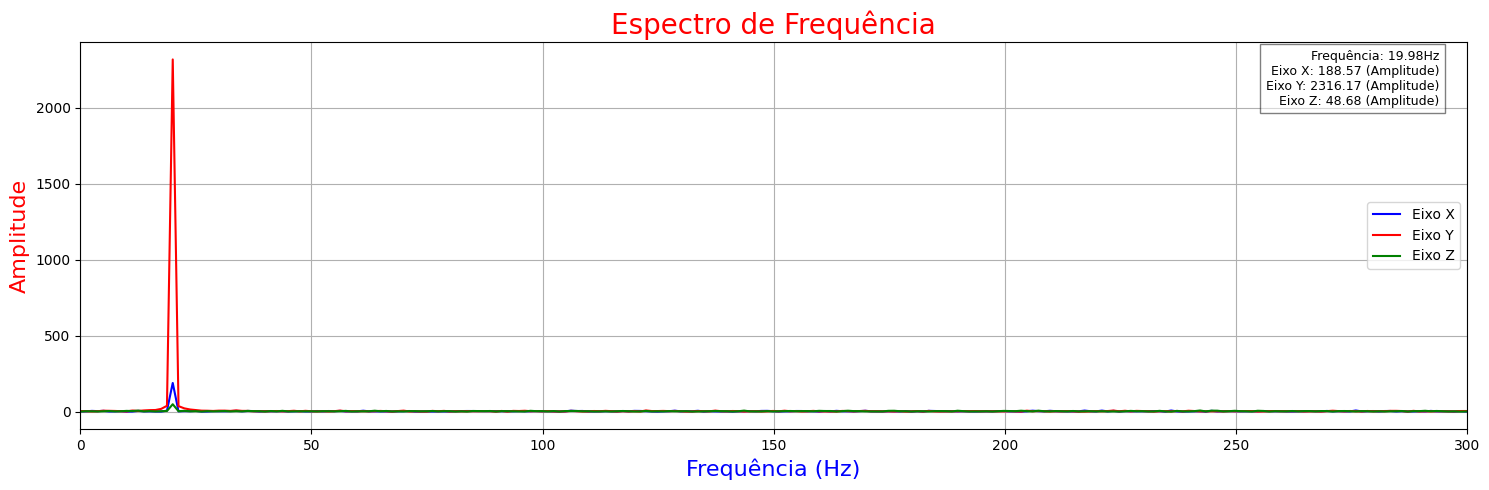

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Semente aleatória para reprodutibilidade:
np.random.seed(42)

# Configuração dos parâmetros:
tempo = np.linspace(0, 0.8, 1000) # Testar, invés de 0.8 --> 20 
frequencia = 20  # Hz

# Geração dos sinais de vibração:
x = 0.3794 * np.sin(2 * np.pi * frequencia * tempo) + 0.1 * np.random.randn(len(tempo)) # Onda senoidal com ruído aleatório
y = -4.6386 * np.sin(2 * np.pi * frequencia * tempo + np.pi/4) + 0.1 * np.random.randn(len(tempo))
z = -0.0973 * np.sin(2 * np.pi * frequencia * tempo + np.pi/3) + 0.1 * np.random.randn(len(tempo))

# Realizando a Transformada Rápida de Fourier (FFT):
fft_x = np.fft.fft(x) # A função np.fft.fft é usada para transformar o sinal do domínio do tempo para o domínio da frequência.
fft_y = np.fft.fft(y) # O resultado da FFT é um número complexo, cuja magnitude (np.abs) representa a amplitude da frequência e a fase pode ser obtida a partir do ângulo do número complexo.
fft_z = np.fft.fft(z)

# Frequências correspondentes:
frequencias = np.fft.fftfreq(len(tempo), d=tempo[1] - tempo[0]) # As frequências correspondentes são obtidas usando np.fft.fftfreq, e apenas as frequências positivas são usadas para o gráfico (uma vez que o espectro é simétrico).

# Tomando apenas a parte positiva das frequências e da FFT (sinal simétrico):
frequencias_positivas = frequencias[:len(frequencias)//2]
fft_x_pos = np.abs(fft_x[:len(fft_x)//2])
fft_y_pos = np.abs(fft_y[:len(fft_y)//2])
fft_z_pos = np.abs(fft_z[:len(fft_z)//2])

# Criação do gráfico no domínio de frequência:
plt.figure(figsize=(15, 5))
plt.plot(frequencias_positivas, fft_x_pos, label='Eixo X', color='blue')
plt.plot(frequencias_positivas, fft_y_pos, label='Eixo Y', color='red')
plt.plot(frequencias_positivas, fft_z_pos, label='Eixo Z', color='green')

plt.title('Espectro de Frequência', c="r", size="20")
plt.xlabel('Frequência (Hz)', c="b", size="16")
plt.ylabel('Amplitude', c="r", size="16")
plt.legend()
plt.grid(True)

# Adicionar informações no canto superior direito:
plt.text(0.98, 0.98, f'Frequência: {frequencias_positivas[np.argmax(fft_x_pos)]:.2f}Hz\n'
                     f'Eixo X: {fft_x_pos[np.argmax(fft_x_pos)]:.2f} (Amplitude)\n'
                     f'Eixo Y: {fft_y_pos[np.argmax(fft_y_pos)]:.2f} (Amplitude)\n'
                     f'Eixo Z: {fft_z_pos[np.argmax(fft_z_pos)]:.2f} (Amplitude)',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))

plt.xlim(0, 300)  # Zoom no eixo de frequências
plt.tight_layout()
#plt.savefig('espectro_de_frequencia.jpg')
plt.show()

<font color="red">Alguns Insights:</font>


Analisando o gráfico de `Espectro de Frequência` acima, podemos extrair os seguintes insights:

* `Frequência dominante:` 

O gráfico mostra um pico proeminente em aproximadamente 19.98 Hz. Esta é a frequência fundamental ou dominante do sistema vibratório.

* `Amplitude relativa entre eixos:`

    * O `eixo Y (vermelho)` apresenta a maior amplitude, com `2316.17`.

    * O `eixo X (azul)` tem a segunda maior amplitude, com `188.57`.

    * O `eixo Z (verde)` mostra a menor amplitude, com `48.68`.
    
Isso indica que a vibração é mais intensa no eixo Y, seguido pelo eixo X, e menos pronunciada no eixo Z.


* `Harmônicos:` 

Não há evidências claras de harmônicos significativos, pois o gráfico mostra principalmente um único pico dominante.

* `Faixa de frequência:` 

O gráfico abrange uma faixa de `0` a `600 Hz`, mas a atividade significativa está concentrada abaixo de `100 Hz`.

* `Ruído de fundo:` 

Há pouco ruído de fundo visível, o que sugere um sinal relativamente limpo ou uma boa relação `sinal-ruído`.

* `Possíveis causas:`

    * A frequência de `19.98 Hz` pode estar relacionada à `velocidade de rotação` de um componente do maquinário, possivelmente um eixo ou rotor.

    * A alta amplitude no `eixo Y` pode indicar um `desalinhamento`, `desbalanceamento` ou `problema de montagem nessa direção`.


* `Saúde do equipamento:` 

A presença de um pico único e bem definido, sem harmônicos significativos ou ruído de banda larga, sugere que o equipamento pode estar operando de forma relativamente estável, mas com um problema específico causando a vibração no `eixo Y`.

* `Necessidade de ação:`

    * A alta amplitude no `eixo Y (2316.17)` é preocupante e pode indicar a necessidade de `manutenção imediata`.

    * Recomenda-se uma investigação mais aprofundada para identificar a causa da vibração excessiva no `eixo Y`.


* `Monitoramento contínuo:` 

Seria útil comparar este espectro com `medições anteriores e futuras` para detectar mudanças ao longo do tempo.

* `Análise complementar:` 

Para um diagnóstico mais preciso, seria benéfico `correlacionar` estes dados com outras informações como o `tipo de máquina`, `velocidade de operação`, e `possíveis frequências de falha conhecidas para os componentes específicos`.


<font color="orange">Estas observações fornecem uma base para uma análise mais detalhada e podem orientar as próximas etapas na manutenção preditiva e no monitoramento de condição do equipamento.</font>

# <font color="gree">Mais um exemplo de Domínio de Frequência</font>

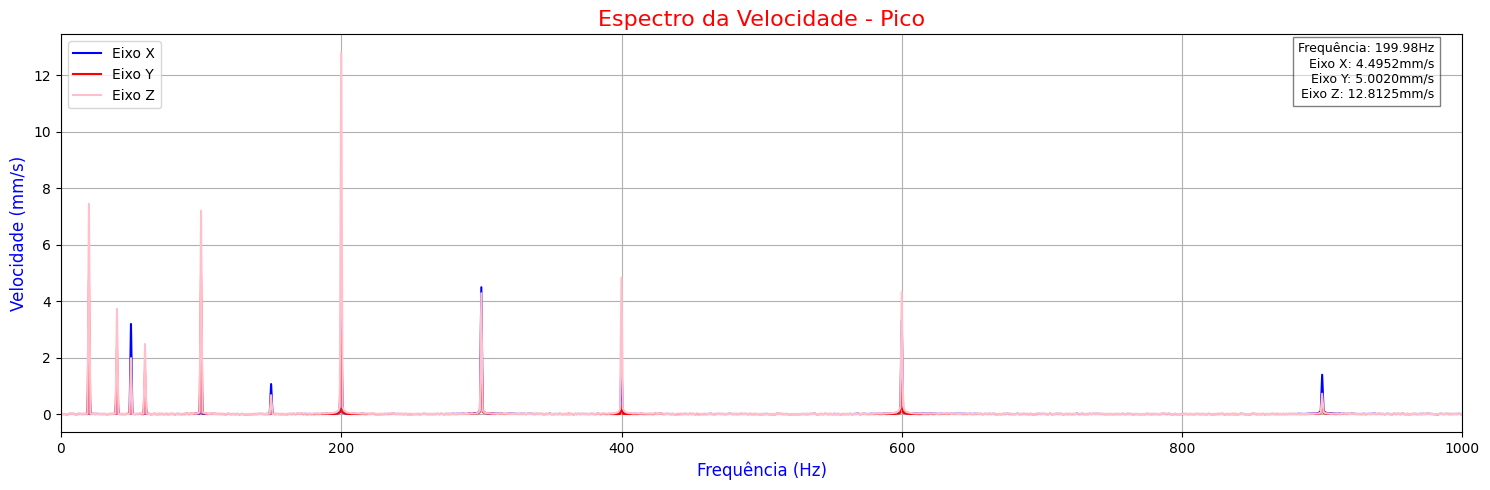

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Semente aleatória para reprodutibilidade:
np.random.seed(42)

# Configuração dos parâmetros:
tempo = np.linspace(0, 1, 10000)
frequencias_fundamentais = [20, 50, 100, 200, 300] # Múltiplas frequências fundamentais

# Para cada frequência fundamental, harmônicos são adicionados e
# Amplitudes aleatórias são aplicadas para cada componente.

# Função para gerar harmônicos:
def gerar_sinal(freq, amplitude, num_harmonicos):
    sinal = amplitude * np.sin(2 * np.pi * freq * tempo)
    for i in range(2, num_harmonicos + 1):
        sinal += (amplitude / i) * np.sin(2 * np.pi * i * freq * tempo)
    return sinal

# Geração dos sinais de vibração:
x = np.zeros_like(tempo)
y = np.zeros_like(tempo)
z = np.zeros_like(tempo)

for freq in frequencias_fundamentais:
    x += gerar_sinal(freq, np.random.uniform(0.0001, 0.001), 3)
    y += gerar_sinal(freq, np.random.uniform(0.0001, 0.001), 3)
    z += gerar_sinal(freq, np.random.uniform(0.0001, 0.002), 3)

# Ruído é adicionado para tornar o espectro mais realista:
x += 0.00005 * np.random.randn(len(tempo))
y += 0.00005 * np.random.randn(len(tempo))
z += 0.00005 * np.random.randn(len(tempo))

# Realizando a Transformada Rápida de Fourier (FFT):
fft_x = np.fft.fft(x)
fft_y = np.fft.fft(y)
fft_z = np.fft.fft(z)

# Frequências correspondentes:
frequencias = np.fft.fftfreq(len(tempo), d=tempo[1] - tempo[0])

# Tomando apenas a parte positiva das frequências e da FFT:
frequencias_positivas = frequencias[:len(frequencias)//2]
fft_x_pos = np.abs(fft_x[:len(fft_x)//2])
fft_y_pos = np.abs(fft_y[:len(fft_y)//2])
fft_z_pos = np.abs(fft_z[:len(fft_z)//2])

# Criação do gráfico no domínio de frequência:
plt.figure(figsize=(15, 5))
plt.plot(frequencias_positivas, fft_x_pos, label='Eixo X', color='blue')
plt.plot(frequencias_positivas, fft_y_pos, label='Eixo Y', color='red')
plt.plot(frequencias_positivas, fft_z_pos, label='Eixo Z', color='pink')

plt.title('Espectro da Velocidade - Pico', c="r", fontsize=16)
plt.xlabel('Frequência (Hz)', c="b", fontsize=12)
plt.ylabel('Velocidade (mm/s)', c="b", fontsize=12)
plt.legend()
plt.grid(True)

# Encontrar o pico máximo:
max_freq = frequencias_positivas[np.argmax(fft_x_pos + fft_y_pos + fft_z_pos)]
max_x = np.max(fft_x_pos)
max_y = np.max(fft_y_pos)
max_z = np.max(fft_z_pos)

# Adicionar informações no canto superior direito:
plt.text(0.98, 0.98, f'Frequência: {max_freq:.2f}Hz\n'
                     f'Eixo X: {max_x:.4f}mm/s\n'
                     f'Eixo Y: {max_y:.4f}mm/s\n'
                     f'Eixo Z: {max_z:.4f}mm/s',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))

plt.xlim(0, 1000)  # Limitar o eixo x para melhor visualização
#plt.ylim(0, 0.005)  # Ajustar o eixo y conforme necessário
plt.tight_layout()
#plt.savefig('espectro_da_velocidade.jpg')
plt.show()

<font color="red">Alguns Insights:</font>


* `Frequência dominante:` 

O pico mais alto ocorre em `199.98 Hz`. Esta é provavelmente a frequência fundamental de vibração do sistema.

* `Amplitude relativa entre eixos:`

    * `Eixo Z (rosa)` tem a maior amplitude: `12.8125 mm/s`

    * `Eixo Y (vermelho)` tem amplitude intermediária: `5.0020 mm/s`

    * `Eixo X (azul)` tem a menor amplitude: `4.4952 mm/s` Isso indica que a vibração é mais intensa no eixo Z.

# <font color="gree">Simulando coleta de dados do `Acelerômetro`, logo Integrado para `Velocidade` e plotado no Domínio de Frequência</font>

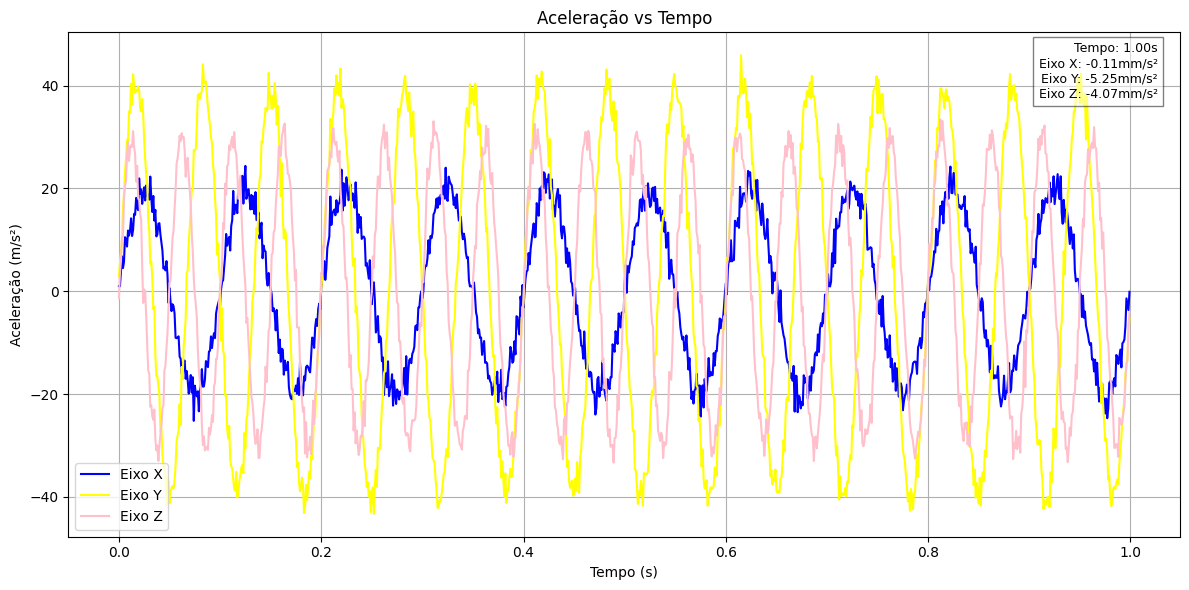

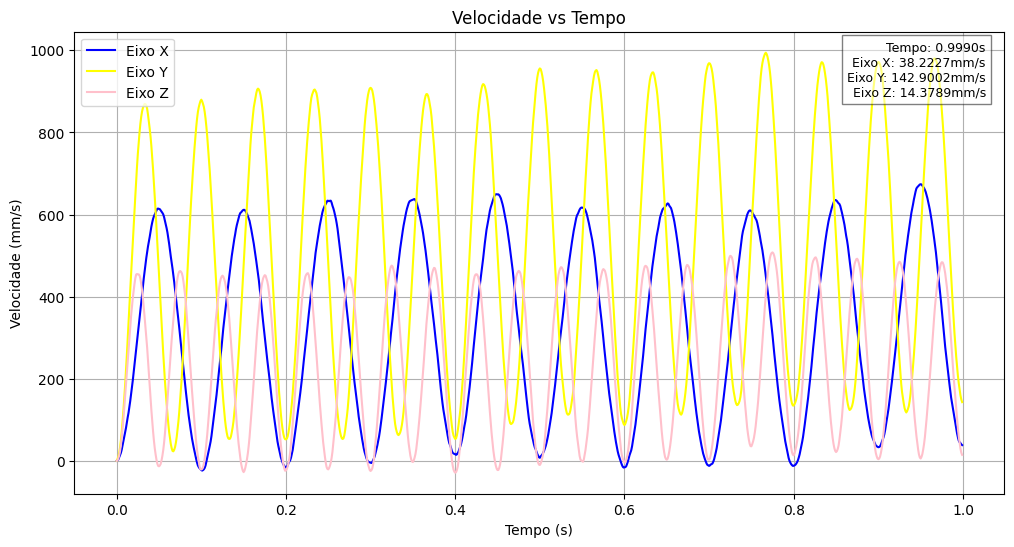

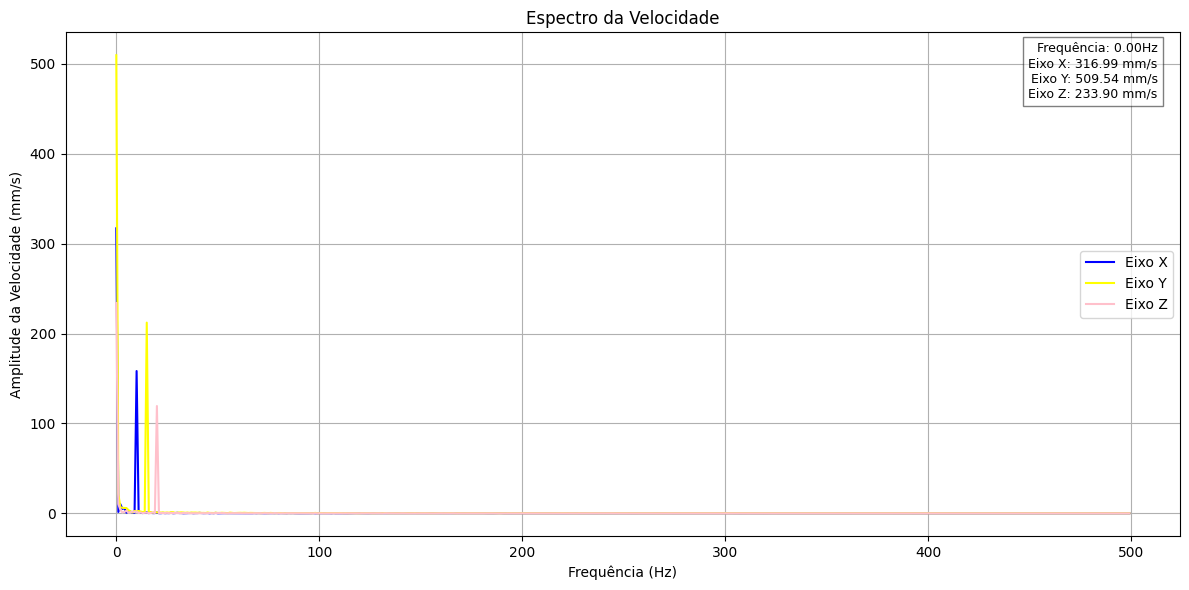

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.integrate import cumulative_trapezoid

# Semente aleatória para reprodutibilidade:
np.random.seed(42)

# Parâmetros de simulação:
duration = 1.0  # Duração total em segundos
sample_rate = 1000  # Taxa de amostragem em Hz
t = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)

# Simulação de aceleração em 3 eixos:
freq_x, freq_y, freq_z = 10, 15, 20  # Frequências em Hz
amplitude_x, amplitude_y, amplitude_z = 20, 40, 30  # Amplitudes em m/s²

ax = amplitude_x * np.sin(2 * np.pi * freq_x * t) + 2 * np.random.randn(len(t))
ay = amplitude_y * np.sin(2 * np.pi * freq_y * t) + 2 * np.random.randn(len(t))
az = amplitude_z * np.sin(2 * np.pi * freq_z * t) + 2 * np.random.randn(len(t))

# Plotagem da aceleração no domínio do tempo:
plt.figure(figsize=(12, 6))
plt.plot(t, ax, label='Eixo X', color="blue")
plt.plot(t, ay, label='Eixo Y', color="yellow")
plt.plot(t, az, label='Eixo Z', color="pink")
plt.title('Aceleração vs Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração (m/s²)')
plt.legend()
plt.tight_layout()
plt.grid(True)

# Adicionar informações no canto superior direito:
plt.text(0.98, 0.98, f'Tempo: {t[-1]:.2f}s\n'
                     f'Eixo X: {ax[-1]:.2f}mm/s²\n'
                     f'Eixo Y: {ay[-1]:.2f}mm/s²\n'
                     f'Eixo Z: {az[-1]:.2f}mm/s²',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

# Integração para obter velocidade:
vx = cumulative_trapezoid(ax, t, initial=0) * 1000  # Convertendo para mm/s
vy = cumulative_trapezoid(ay, t, initial=0) * 1000
vz = cumulative_trapezoid(az, t, initial=0) * 1000

# Plotagem da velocidade no domínio do tempo:
plt.figure(figsize=(12, 6))
plt.plot(t, vx, label='Eixo X', color="blue")
plt.plot(t, vy, label='Eixo Y', color="yellow")
plt.plot(t, vz, label='Eixo Z', color="pink")
plt.title('Velocidade vs Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (mm/s)')
plt.legend()
plt.grid(True)

# Adicionar informações no canto superior direito:
plt.text(0.98, 0.98, f'Tempo: {t[-1]:.4f}s\n'
                     f'Eixo X: {vx[-1]:.4f}mm/s\n'
                     f'Eixo Y: {vy[-1]:.4f}mm/s\n'
                     f'Eixo Z: {vz[-1]:.4f}mm/s',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

# Transformada de Fourier da velocidade:
Vx = fft(vx)
Vy = fft(vy)
Vz = fft(vz)
#print(len(Vx))
# Cálculo das frequências para o eixo x do gráfico:
freq = np.fft.fftfreq(len(t), 1/sample_rate) # ou --> np.fft.fftfreq(len(tempo), d=t[1] - t[0])
#print(len(freq))
# Tomando apenas a parte positiva das frequências e da FFT (sinal simétrico):
frequencias_positivas = freq[:len(freq)//2]
fft_x_pos = np.abs(Vx)[:len(freq)//2] / len(Vx) # São iguais --> print(len(Vx)) = print(len(freq))
fft_y_pos = np.abs(Vy[:len(Vy)//2]) / len(Vy)
fft_z_pos = np.abs(Vz[:len(Vz)//2]) / len(Vz)

# Plotagem no domínio da frequência:
plt.figure(figsize=(12, 6))
plt.plot(frequencias_positivas, fft_x_pos, label='Eixo X', color="blue")
plt.plot(frequencias_positivas, fft_y_pos, label='Eixo Y', color="yellow")
plt.plot(frequencias_positivas, fft_z_pos, label='Eixo Z', color="pink")
plt.title('Espectro da Velocidade')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude da Velocidade (mm/s)')
plt.legend()
plt.tight_layout()
plt.grid(True)

# Encontrar o pico máximo:
max_freq = frequencias_positivas[np.argmax(fft_x_pos + fft_y_pos + fft_z_pos)]
max_x = np.max(fft_x_pos) # ou --> fft_x_pos[np.argmax(fft_x_pos)]
max_y = np.max(fft_y_pos) # ou --> fft_y_pos[np.argmax(fft_y_pos)]
max_z = np.max(fft_z_pos) # ou --> fft_z_pos[np.argmax(fft_z_pos)]

# Adicionar informações no canto superior direito:
plt.text(0.98, 0.98, f'Frequência: {max_freq:.2f}Hz\n'
                     f'Eixo X: {max_x:.2f} mm/s\n'
                     f'Eixo Y: {max_y:.2f} mm/s\n'
                     f'Eixo Z: {max_z:.2f} mm/s',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))

#plt.xlim(0, 10)  # Limitando a visualização até 100 Hz para melhor clareza
plt.show()

# <font color="gree">Outro exemplo de Domínio de Tempo (s) e Frequência (Hz)</font>

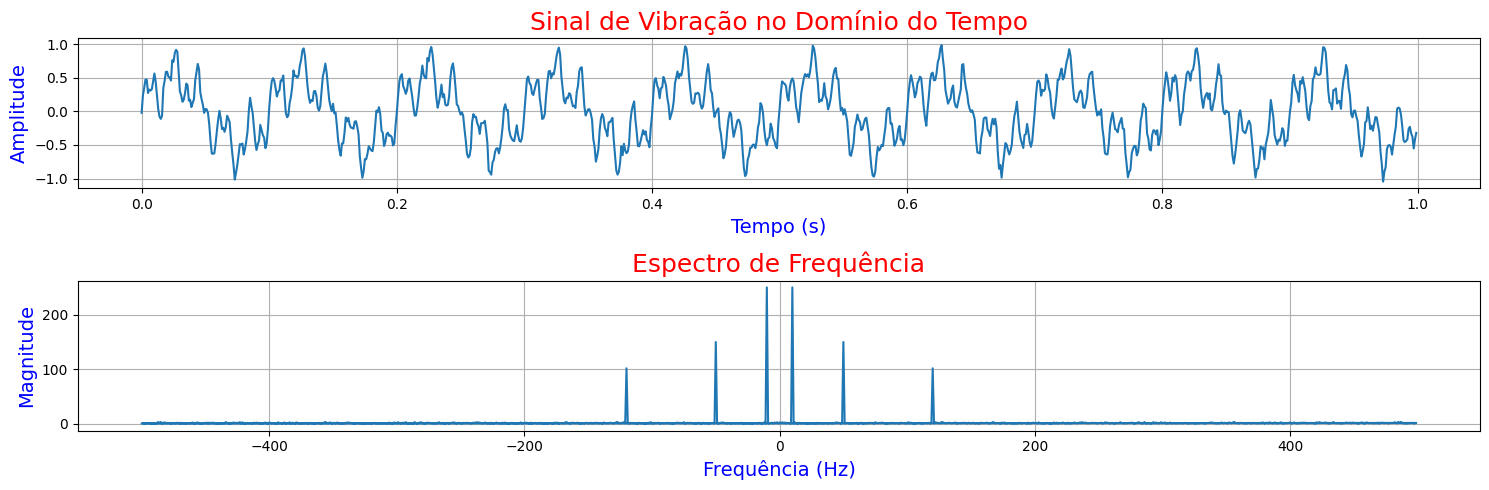

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Simulação de dados de vibração:
def simulate_vibration(t: np.ndarray, frequencies: list, amplitudes: list) -> np.ndarray:
    """
    Simula um sinal de vibração com base em frequências e amplitudes fornecidas.

    Esta função gera um sinal de vibração combinando ondas senoidais para cada
    frequência e amplitude especificadas. O sinal resultante é a soma das
    ondas senoidais, representando a vibração total ao longo do tempo.

    Parâmetros:
    t (numpy.ndarray): Um array unidimensional que representa o tempo em segundos.
    frequencies (list): Uma lista de frequências (em Hz) para as quais as ondas
                        senoidais serão geradas.
    amplitudes (list): Uma lista de amplitudes correspondentes às frequências,
                       que determina a altura das ondas senoidais.

    Retorna:
    numpy.ndarray: Um array unidimensional contendo o sinal de vibração simulado
                   ao longo do tempo especificado.

    Exemplo:
    >>> t = np.linspace(0, 1, 1000)  # 1 segundo com 1000 pontos
    >>> frequencies = [5, 10]          # Frequências em Hz
    >>> amplitudes = [1, 0.5]          # Amplitudes correspondentes
    >>> signal = simulate_vibration(t, frequencies, amplitudes)
    """
    
    signal = np.zeros_like(t)
    for f, a in zip(frequencies, amplitudes):
        signal += a * np.sin(2 * np.pi * f * t)
    
    return signal


# Parâmetros da simulação:
duration = 1.0  # segundos
sample_rate = 1000  # Hz
n_samples = int(duration * sample_rate)
t = np.linspace(0, duration, n_samples, endpoint=False)

# Simulando um sinal com múltiplas frequências:
frequencies = [10, 50, 120]  # Hz
amplitudes = [0.5, 0.3, 0.2]
vibration_signal = simulate_vibration(t, frequencies, amplitudes)

# Adicionando ruído ao sinal:
noise = np.random.normal(0, 0.05, n_samples) # gera números aleatórios que seguem uma distribuição normal/gaussiana (média, desvio padrão, Valores aleatórios)
noisy_signal = vibration_signal + noise # A adição do ruído simula condições mais realistas em aplicações práticas, onde os sinais podem ser afetados por interferências externas ou limitações dos sensores.

# Realizando a Transformada Rápida de Fourier (FFT):
fft_result = fft(noisy_signal)
fft_freq = np.fft.fftfreq(n_samples, 1/sample_rate)

# Calculando a magnitude do espectro:
magnitude_spectrum = np.abs(fft_result)

# Plotando os resultados
plt.figure(figsize=(15, 5))

plt.subplot(2, 1, 1)
plt.plot(t, noisy_signal)
plt.title('Sinal de Vibração no Domínio do Tempo', c="r", fontsize=18)
plt.xlabel('Tempo (s)', c="b", fontsize=14)
plt.ylabel('Amplitude', c="b", fontsize=14)
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(fft_freq[:n_samples], magnitude_spectrum[:n_samples]) # Pode usar (apenas para a parte positiva) --> fft_freq[:n_samples//2], magnitude_spectrum[:n_samples//2]
"""
O motivo para selecionar apenas metade das frequências é devido à propriedade de simetria da FFT de sinais reais. 
Quando calculamos a FFT de um sinal real, a segunda metade dos valores de frequência é simétrica à primeira metade, portanto, é comum considerar apenas a primeira metade.
"""
plt.title('Espectro de Frequência', c="r", fontsize=18)
plt.xlabel('Frequência (Hz)', c="b", fontsize=14)
plt.ylabel('Magnitude', c="b", fontsize=14)
#plt.xlim(0, 200)

plt.tight_layout() # Serve para ajustar automaticamente os parâmetros de subplot, garantindo que os elementos do gráfico (como títulos, rótulos e legendas) não se sobreponham e que haja um espaçamento adequado entre eles.
plt.grid(True)
plt.show()

In [10]:
from scipy.signal import find_peaks  # Adicionando esta importação

# Identificando as frequências dominantes corretamente:
peaks, _ = find_peaks(magnitude_spectrum[:n_samples//2], height=0.1*np.max(magnitude_spectrum[:n_samples//2]))
peak_frequencies = fft_freq[peaks]
peak_frequencies = peak_frequencies[peak_frequencies > 0]  # Removendo frequências negativas ou zero
print("Frequências dominantes detectadas:", np.sort(np.abs(peak_frequencies)))

Frequências dominantes detectadas: [ 10.  50. 120.]
